In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

hp = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

hp.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [4]:
import scipy.stats as stats
from scipy.stats.mstats import winsorize

#add winsorized variables to original dataframe
hp['wins_saleprice'] = winsorize(hp['saleprice'], (0, 0.05))
hp['wins_grlivarea'] = winsorize(hp['grlivarea'], (0, 0.05))
hp['wins_garagearea'] = winsorize(hp['garagearea'], (0, 0.05))
hp['wins_totalbsmtsf'] = winsorize(hp['totalbsmtsf'], (0, 0.05))
hp['wins_firstflrsf'] = winsorize(hp['firstflrsf'], (0, 0.05))

In [5]:
# Y is the target variable
Y = hp['wins_saleprice']

# X is the feature set 
X = hp[['overallqual', 'fullbath', 'garagecars', 'wins_totalbsmtsf', 'wins_firstflrsf', 'wins_grlivarea','wins_garagearea']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(Y_train, X_train).fit()

results.summary()

The number of observations in training set is 1168
The number of observations in test set is 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         wins_saleprice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     771.9
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:54:47   Log-Likelihood:                -13601.
No. Observations:                1168   AIC:                         2.722e+04
Df Residuals:                    1160   BIC:                         2.726e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.033e+04   4010.654    -20.030      0.000   -8.82e+04   -7.25e+04
overallqual       2.006e+04    897.599     22.346      0.000    1.83e+04    2.18e+04
fullbath           757.1238   2007.888      0.377      0.706   -3182.374    4696.622
garagecars        7593.9538   2642.092      2.874      0.004    2410.141    1.28e+04
wins_totalbsmtsf    29.6972      3.648      8.141      0.000      22.540      36.854
wins_firstflrsf      8.5131      4.164      2.045      0.041       0.344      16.682
wins_grlivarea      42.3755      2.653     15.975      0.000      37.171      47.580
wins_garagearea     33.8475      9.424      3.592      0.000      15.357      52.338
==============================================================================
Omnibus:                      159.910   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.578
Skew:                          -0.595   Prob(JB):                    8.83e-142
Kurtosis:                       6.454   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the goodness of fit measures they all look pretty good. The adjusted R-squared value is pretty high at 0.822. The p-value of the fullbath feature is very high however and could be removed. 

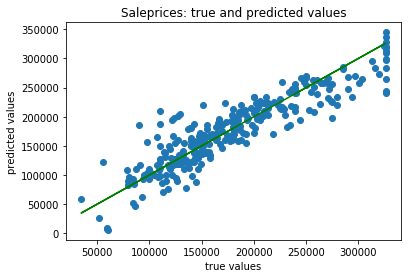

Mean absolute error of the prediction is: 20898.84024768769
Mean squared error of the prediction is: 784714839.8950375
Root mean squared error of the prediction is: 28012.762089716136
Mean absolute percentage error of the prediction is: 14.089328852092017


In [7]:
#making predictions
X_test = sm.add_constant(X_test)

Y_preds = results.predict(X_test)

plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color="green")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Saleprices: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, Y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - Y_preds) / Y_test)) * 100))


Overall, I would say this model is doing fairly well. For the most part the predictions are grouped around the regression line. The statistics look a little high but with nothing to compare to yet it is hard to tell how accurate they are. The mean absolute percentage error at 14.09 seems to be good however. 

In [11]:
hp["dummies_utilities"] = pd.get_dummies(hp.utilities, drop_first=True)
hp["dummies_centralair"] = pd.get_dummies(hp.centralair, drop_first=True)

In [12]:
## second model: add dummies variables, remove fullbath and wins_firstflrsf
# Y is the target variable
Y = hp['wins_saleprice']

# X is the feature set 
X = hp[['overallqual', 'garagecars', 'wins_totalbsmtsf', 'wins_grlivarea','wins_garagearea', 'dummies_utilities', 'dummies_centralair']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(Y_train, X_train).fit()

results.summary()

The number of observations in training set is 1168
The number of observations in test set is 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         wins_saleprice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     787.8
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:16:55   Log-Likelihood:                -13591.
No. Observations:                1168   AIC:                         2.720e+04
Df Residuals:                    1160   BIC:                         2.724e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.884e+04   4430.266    -20.053      0.000   -9.75e+04   -8.01e+04
overallqual         1.912e+04    877.639     21.781      0.000    1.74e+04    2.08e+04
garagecars          7640.6665   2598.139      2.941      0.003    2543.088    1.27e+04
wins_totalbsmtsf      33.9958      2.552     13.322      0.000      28.989      39.003
wins_grlivarea        45.9675      2.255     20.382      0.000      41.543      50.392
wins_garagearea       33.0156      9.297      3.551      0.000      14.774      51.257
dummies_utilities  -2.735e+04   2.75e+04     -0.995      0.320   -8.13e+04    2.66e+04
dummies_centralair  1.676e+04   3475.315      4.822      0.000    9938.194    2.36e+04
==============================================================================
Omnibus:                      138.387   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.566
Skew:                          -0.486   Prob(JB):                    7.01e-128
Kurtosis:                       6.330   Cond. No.                     6.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

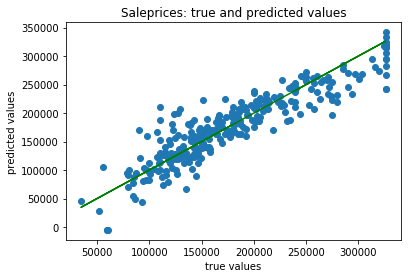

Mean absolute error of the prediction is: 20812.788884136604
Mean squared error of the prediction is: 776979435.7445648
Root mean squared error of the prediction is: 27874.350857814872
Mean absolute percentage error of the prediction is: 14.006927618625351


In [13]:
#making predictions
X_test = sm.add_constant(X_test)

Y_preds = results.predict(X_test)

plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color="green")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Saleprices: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, Y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - Y_preds) / Y_test)) * 100))
 

Looking at the second model it appears to be performing very similarly to the first model. All the goodness of fit measures are close to the same and so are the prediction measurements. 

In [14]:
## third model: add totrmsabvgrd and yearbuilt, remove dummies_utilities
# Y is the target variable
Y = hp['wins_saleprice']

# X is the feature set 
X = hp[['overallqual', 'garagecars', 'totrmsabvgrd', 'yearbuilt', 'wins_totalbsmtsf', 'wins_grlivarea','wins_garagearea', 'dummies_centralair']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(Y_train, X_train).fit()

results.summary()

The number of observations in training set is 1168
The number of observations in test set is 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         wins_saleprice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     737.6
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:21:46   Log-Likelihood:                -13558.
No. Observations:                1168   AIC:                         2.713e+04
Df Residuals:                    1159   BIC:                         2.718e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.141e+05   6.78e+04     -9.061      0.000   -7.47e+05   -4.81e+05
overallqual          1.63e+04    919.952     17.716      0.000    1.45e+04    1.81e+04
garagecars          4173.6740   2568.412      1.625      0.104    -865.584    9212.932
totrmsabvgrd       -1869.6100    896.047     -2.087      0.037   -3627.665    -111.555
yearbuilt            281.0113     35.741      7.862      0.000     210.887     351.135
wins_totalbsmtsf      31.4800      2.500     12.592      0.000      26.575      36.385
wins_grlivarea        56.9509      3.607     15.787      0.000      49.873      64.029
wins_garagearea       31.9450      9.060      3.526      0.000      14.169      49.721
dummies_centralair  9913.0381   3480.005      2.849      0.004    3085.224    1.67e+04
==============================================================================
Omnibus:                      130.565   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.643
Skew:                          -0.392   Prob(JB):                    6.32e-141
Kurtosis:                       6.557   Cond. No.                     2.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

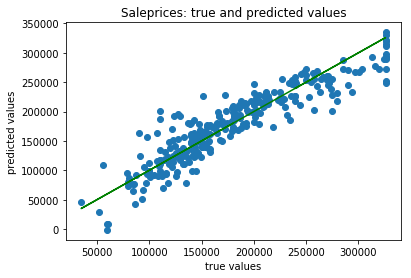

Mean absolute error of the prediction is: 19642.677645927837
Mean squared error of the prediction is: 684598096.0648048
Root mean squared error of the prediction is: 26164.825550054884
Mean absolute percentage error of the prediction is: 13.019816488715533


In [15]:
#making predictions
X_test = sm.add_constant(X_test)

Y_preds = results.predict(X_test)

plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color="green")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Saleprices: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, Y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - Y_preds) / Y_test)) * 100))
 

This last model had the best performance in terms of goodness of fit measures and prediction metrics. It had a higher adjusted R-squared and lower AIC & BIC values. Also, all of the prediction metrics were lower. There could still be some improvements but overall I think it is performing well. 